# **Conjunto de Julia y conjunto de Mandelbrot**

### **Harold Andres Aguilar Beltran** 


Considere $z_{k+1}=z_{k}^{2}+c$, siendo $z,c\in\mathbb{C}$ y la sucesion: $\{z_{0} ,z_{1} , z_{2}, z_{3}, \cdots \}$ 

**Conjunto de Julia:** Para un valor $c$ dado, es el conjunto de todos los puntos iniciales $z_0$ con los cuales la sucesion converge o se mantiene acotada.

**Construccion:**Se construira el conjunto de Julia con la formula recursiva:

$z_{k+1}=z_{k}^{2}+c$; $\phantom{assss}$ $\underset{variable}{\underbrace{z_k =x+yi}}$;  $\phantom{assss}$$\underset{constante}{\underbrace{c=a+bi}}$; $\phantom{assss}$ $k=0,1,2,...$

In [2]:
import numpy as np
import numba
from matplotlib import pyplot as plt

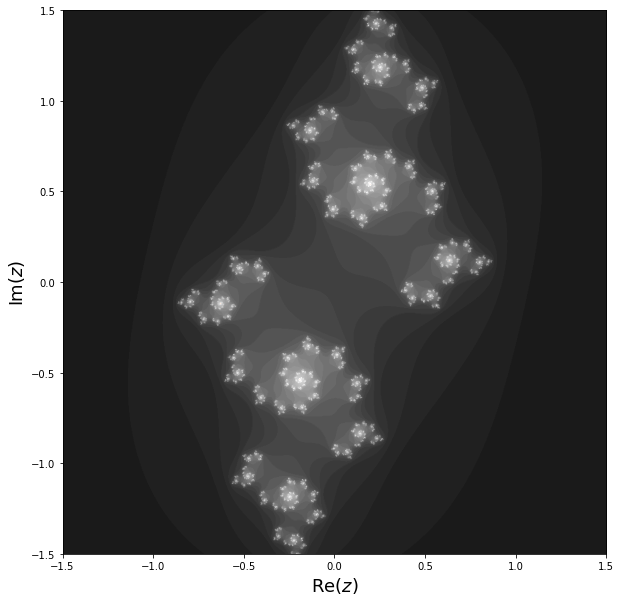

In [5]:
N=1024
a=np.linspace(-1.5,1.5,N)
b=np.linspace(-1.5,1.5,N)
c=complex(-0.8 , 0.4)
Z=np.zeros(len(a), dtype = complex)

def julia_set(a, b, m):
  for i in range(len(a)):
    for j in range(len(b)):
      Z=complex(a[i], b[j])
      for k in range(300):
        Z= Z**2 + c
        if np.abs(Z)>2.0:
          m[i,j]=k
          break 


plot_julia_set = numba.jit(nopython=True)(julia_set)


m=np.zeros((N, N), np.int64)
plot_julia_set(a, b, m)

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(m, cmap=plt.cm.RdGy_r, extent=[-1.5, 1.5, -1.5, 1.5])
ax.set_xlabel("$\mathrm{Re}(z)$", fontsize=18)
ax.set_ylabel("$\mathrm{Im}(z)$", fontsize=18)
plt.show()

**Conjunto de Mandelbrot:** Sea $z_0=0$, es el conjunto de todos los posibles valores $c=a+bi$ para los que la sucesion o converge o se mantiene acotada. Observe que $c$ es el numero complejo asociado al pixel que estamos procesando y es siempre el mismo en cada iteracion. 

$\begin{matrix}
Z_0 = z_0\\
Z_1=Z_0^2+C\\ 
Z_2=Z_1^2+C\\ 
Z_3=Z_2^2+C\\\cdots + C 
\end{matrix}$

**Observacion:**Para cada pixel tenemos un numero entero que representa cuantas iteraciones hemos realizado antes de parar, eso es lo que calculamos para cada pixel un unico valor entero

**Construccion:**Se construira el conjunto de Mandelbrot con la formula recursiva:

$z_{k+1}=z_{k}^{2}+c$; $\phantom{assss}$ $z_0=0$; $\phantom{assss}$ $\underset{variable}{\underbrace{c=a+bi}}$;


además un pseudo algoritmo para dibujar el conjunto de Mandelbrot sería el siguiente:

-Escoger un $N$ entero, como el máximo número de iteraciones.

-Escoger un número real $s \geq 2$.

-Colorear a el número comlejo(pixel) de negro si $|p_c^n (0)| \leq s$ para todo $n\leq N$.

-De lo contrario coloree a c en color $n$, donde $n$ es el número más pequeño para el cual $|p_c^{(n)}(0)|>s$



$\textbf{OBS:}$ Para graficar a $M$, hay que concentrarse en el punto $0$. Dado el polinomio
$p_c (z)=z^2 + c$,  su comportamiento es determinado por el comportamiento del
punto critico $0$. Se trata de saber si la órbita en $0$ escapa con el tiempo ó no.

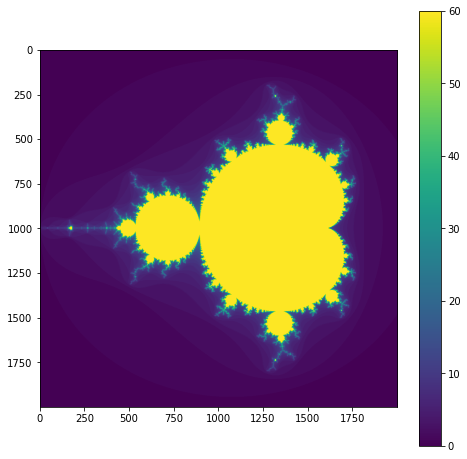

In [ ]:
def mandelbrot( h,w, maxit=60):
    y,x = np.ogrid[ -1.4:1.4:h*1j, -2:0.8:w*1j ]
    c = x+y*1j
    z = c
    divtime = maxit + np.zeros(z.shape, dtype=int)
    
    for i in range(maxit):
        z  = z**2 + c
        diverge = z*np.conj(z) > 2**2        
        div_now = diverge & (divtime==maxit)  
        divtime[div_now] = i                  
        z[diverge] = 2                        
        
    return divtime

mandelbrot_set = numba.jit(nopython=True)(mandelbrot)
#mandelbrot_set(2000,2000)

plt.figure(figsize=(8,8))
plt.imshow(mandelbrot(2000,2000))
plt.colorbar()
plt.show()
